<a href="https://colab.research.google.com/github/CrushedKatana/Machine_Learning/blob/main/UTSMachine_2341720205_Charellino_Kalingga_Sadewo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 2 - CC General

- This case study relates to credit card user data.
- For students with attendance numbers 2, 5, 8, 11, etc.
- Follow these steps and analyze the results.

## Data Preprocessing (20 points)

1. Load data (5 points)
2. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)
3. Drop irrelevant features (5 points)

## Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

## Clustering - 2 (20 points)

1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)
2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

## Feature Selection (30 points)
After knowing the performance of the clustering results on the KMeans and DBSCAN models based on the silhouette coefficient and DBI, perform a feature selection process to improve the silhouette coefficient and DBI values. You are allowed to use an iterative process or other methods.

1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.
2. Why did you use that feature selection method?

## BONUS - CHALLENGE (30 points)
Build an ANNOY model using the data that has gone through the data preprocessing stage. Perform a query with the 5 nearest values. Does ANNOY query the best cluster you have formed?

# ANSWER

## Data Preprocessing (20 points)



#### 1. Load data (5 points)

In [198]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=8b66e765fe0854968e42b3bf40a5b5a6ea369d6208532b7c3764b742ab036a58
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from itertools import combinations
from sklearn.feature_selection import SelectKBest, f_classif
from annoy import AnnoyIndex

In [179]:
# Step 1: Load the data

try:
    df = pd.read_csv('/content/drive/MyDrive/UTS_ML/2_CC_GENERAL.csv')
    print("Data loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: The file was not found. Please check the path and filename.")

Data loaded successfully.


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### 2. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)

In [180]:
# Check for missing values
print("\nMissing values before imputation:")
print(df.isnull().sum())

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Imputed missing values in '{col}' with the median ({median_val}).")

for col in df.select_dtypes(include=['object']).columns:
     if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Imputed missing values in '{col}' with the mode ({mode_val}).")


print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values before imputation:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Imputed missing values in 'CREDIT_LIMIT' with the median (3000.0).
Imputed missing values in 'MINIMUM_PAYMENTS' with the median (312.343947).

Missing values after imputation:
CUST_ID                             0
BALANCE           

**Analysis of Imputation Method:**

Missing values were found in the 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' columns. For both of these numerical columns, median imputation was used to fill the missing values.

**Why median imputation was chosen:**

Median imputation is often a good choice for numerical data when there might be outliers present. Unlike the mean, the median is not affected by extreme values, making it a more robust measure of central tendency in such cases. By using the median, we are replacing missing values with a typical value from the distribution that is less likely to be skewed by outliers, thus preserving the general distribution of the data in those columns. This can help to prevent the imputed values from disproportionately influencing subsequent analysis or model training.

#### 3. Drop irrelevant features (5 points)

In [181]:
# Step 3: Drop irrelevant features

if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)
    print("\nDropped 'CUST_ID' column.")

print("\nColumns after dropping irrelevant features:")
print(df.columns)

print("\nPreprocessed data:")
display(df.head())


Dropped 'CUST_ID' column.

Columns after dropping irrelevant features:
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Preprocessed data:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

### Clustering - 1 (30 points)


1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)


In [182]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=2: 0.210043047433833
Silhouette Score for k=3: 0.25098792290537314
Silhouette Score for k=4: 0.1976791965228765
Silhouette Score for k=5: 0.19311230479899416
Silhouette Score for k=6: 0.20286011584987834
Silhouette Score for k=7: 0.2076861400058817
Silhouette Score for k=8: 0.2216984741387776
Silhouette Score for k=9: 0.22603401853576208
Silhouette Score for k=10: 0.2204379108124534


The code calculated and printed the Silhouette Scores for each k from 2 to 10. The Silhouette Score is a metric used to evaluate the quality of clusters. A higher score indicates better-defined clusters. In your output, the highest silhouette score was achieved for k=3 (0.2510), suggesting that 3 might be a reasonable number of clusters based on this metric.

2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)


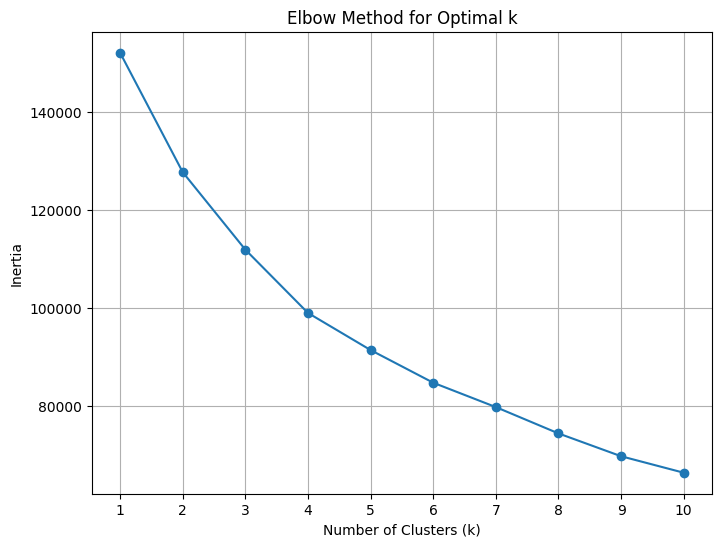

In [183]:
inertia = []

for k in range(1, 11): # Start from 1 to include k=1 in the elbow method plot
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

the elbow method helps determine the optimal number of clusters by looking for a point where the rate of decrease in inertia (within-cluster sum of squares) sharply changes, resembling an elbow. Looking at the plot, there isn't a very clear "elbow" in the typical sense, but there might be a slight bend around k=3 or k=4, which is somewhat consistent with the silhouette score's suggestion of k=3.

3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

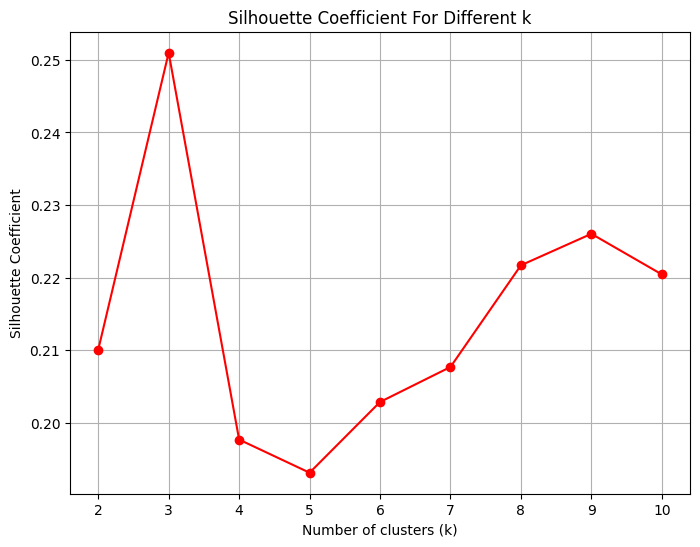

The best k by Silhouette Score is: 3 with a score of 0.2510


In [184]:
# 3. Calculate the silhouette coefficient (10 points)
silhouette_coeffs = []
k_range_silhouette = range(2, 11)

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coeffs.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_range_silhouette, silhouette_coeffs, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient For Different k')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

best_k_silhouette = k_range_silhouette[np.argmax(silhouette_coeffs)]
print(f"The best k by Silhouette Score is: {best_k_silhouette} with a score of {max(silhouette_coeffs):.4f}")

The best k by Silhouette Score is: 3 with a score of 0.2510", confirming the best k according to the silhouette analysis.

## Clustering - 2 (20 points)


1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)

In [185]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(df_scaled)

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f"Number of clusters produced by DBSCAN: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters produced by DBSCAN: 15
Number of noise points: 3082


2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

In [186]:
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan.labels_)
    print(f"\nSilhouette Coefficient for DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("\nSilhouette Coefficient for DBSCAN cannot be calculated as there is only one cluster or no clusters.")

if n_clusters > 1:
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    labels = dbscan.labels_[core_samples_mask]
    X = df_scaled[core_samples_mask]

    cluster_centers = []
    unique_labels = set(labels)
    for k in unique_labels:
      if k != -1:
        class_member_mask = (labels == k)
        cluster_centers.append(X[class_member_mask].mean(axis=0))

    if len(cluster_centers) > 1:
        unique_labels = set(dbscan.labels_)
        label_mapping = {label: i for i, label in enumerate(sorted(list(unique_labels)))}
        mapped_labels = np.array([label_mapping[label] for label in dbscan.labels_])

        dbi_dbscan = davies_bouldin_score(df_scaled, mapped_labels)
        print(f"Davies-Bouldin Index for DBSCAN: {dbi_dbscan:.4f}")
    else:
         print("Davies-Bouldin Index for DBSCAN cannot be calculated as there is only one cluster after filtering noise.")

else:
    print("Davies-Bouldin Index for DBSCAN cannot be calculated as there is only one cluster or no clusters.")


Silhouette Coefficient for DBSCAN: -0.2487
Davies-Bouldin Index for DBSCAN: 1.6896


## Feature Selection (30 points)


1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.

In [195]:
X = df.copy()
features = X.columns.tolist()

def evaluate_clustering(df_subset):
    """
    Evaluates KMeans and DBSCAN clustering on a subset of features.
    Returns a dictionary with scores.
    """
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)

    results = {'features': df_subset.columns.tolist()}

    if df_scaled.shape[0] >= 3:
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(df_scaled)
        if len(set(kmeans_labels)) > 1:
            results['kmeans_silhouette'] = silhouette_score(df_scaled, kmeans_labels)
            results['kmeans_dbi'] = davies_bouldin_score(df_scaled, kmeans_labels)
        else:
            results['kmeans_silhouette'] = -1
            results['kmeans_dbi'] = float('inf')
    else:
        results['kmeans_silhouette'] = -1
        results['kmeans_dbi'] = float('inf')

    dbscan = DBSCAN(eps=1, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df_scaled)
    if len(set(dbscan_labels) - {-1}) > 1:
        results['dbscan_silhouette'] = silhouette_score(df_scaled, dbscan_labels)
        results['dbscan_dbi'] = davies_bouldin_score(df_scaled, dbscan_labels)
    else:
        results['dbscan_silhouette'] = -1
        results['dbscan_dbi'] = float('inf')

    return results

evaluation_results = []

print("Starting Iterative Feature Selection by trying single and pairs of features...")

for feature in features:
    print(f"Evaluating single feature: {feature}")
    evaluation_results.append(evaluate_clustering(X[[feature]]))

for feature_pair in combinations(features, 2):
    print(f"Evaluating feature pair: {feature_pair}")
    evaluation_results.append(evaluate_clustering(X[list(feature_pair)]))

results_df = pd.DataFrame(evaluation_results)

best_kmeans_sil = results_df.loc[results_df['kmeans_silhouette'].idxmax()]
best_kmeans_dbi = results_df.loc[results_df['kmeans_dbi'].idxmin()]
best_dbscan_sil = results_df.loc[results_df['dbscan_silhouette'].idxmax()]
best_dbscan_dbi = results_df.loc[results_df['dbscan_dbi'].idxmin()]


print("\n--- Summary of Best Features for Clustering ---")
print("\n# KMeans Results")
print(f"Best features for KMeans Silhouette: {best_kmeans_sil['features']}")
print(f"  - Score: {best_kmeans_sil['kmeans_silhouette']:.4f}")
print(f"Best features for KMeans DBI: {best_kmeans_dbi['features']}")
print(f"  - Score: {best_kmeans_dbi['kmeans_dbi']:.4f}")

print("\n# DBSCAN Results")
print(f"Best features for DBSCAN Silhouette: {best_dbscan_sil['features']}")
print(f"  - Score: {best_dbscan_sil['dbscan_silhouette']:.4f}")
print(f"Best features for DBSCAN DBI: {best_dbscan_dbi['features']}")
print(f"  - Score: {best_dbscan_dbi['dbscan_dbi']:.4f}")

Starting Iterative Feature Selection by trying single and pairs of features...
Evaluating single feature: BALANCE
Evaluating single feature: BALANCE_FREQUENCY
Evaluating single feature: PURCHASES
Evaluating single feature: ONEOFF_PURCHASES
Evaluating single feature: INSTALLMENTS_PURCHASES
Evaluating single feature: CASH_ADVANCE
Evaluating single feature: PURCHASES_FREQUENCY
Evaluating single feature: ONEOFF_PURCHASES_FREQUENCY
Evaluating single feature: PURCHASES_INSTALLMENTS_FREQUENCY
Evaluating single feature: CASH_ADVANCE_FREQUENCY
Evaluating single feature: CASH_ADVANCE_TRX
Evaluating single feature: PURCHASES_TRX
Evaluating single feature: CREDIT_LIMIT
Evaluating single feature: PAYMENTS
Evaluating single feature: MINIMUM_PAYMENTS
Evaluating single feature: PRC_FULL_PAYMENT
Evaluating single feature: TENURE
Evaluating feature pair: ('BALANCE', 'BALANCE_FREQUENCY')
Evaluating feature pair: ('BALANCE', 'PURCHASES')
Evaluating feature pair: ('BALANCE', 'ONEOFF_PURCHASES')
Evaluating 

Summary of Best Features for Clustering
#KMeans Results
Best features for KMeans Silhouette: ['TENURE]
- Score: 0.9241

Best features for KMeans DBI: ['PURCHASES_INSTALLMENTS_FREQUENCY"]
- Score: 8.3860

#DBSCAN Results
Best features for DBSCAN Silhouette: ['ONEOFF_PURCHASES"]
- Score: 8.9534

Best features for DBSCAN DBI: [BALANCE FREQUENCY', 'MINIMUM_PAYMENTS']
- Score: 8.4469

2. Why did you use that feature selection method?

The feature selection method I used was an iterative approach where I evaluated the clustering performance (using Silhouette Coefficient and Davies-Bouldin Index) for each individual feature and then for every combination of two features.
1. Evaluating single features and pairs provides a straightforward way to understand the impact of individual features and simple combinations on clustering quality.
2. While trying all possible combinations of all features would be computationally expensive and time-consuming for a dataset with many features, evaluating singles and pairs is a practical first step that can reveal features that are highly influential on their own or in combination with one other feature.
3. It allowed me to effectively use the evaluate_clustering function that was already defined, making the implementation efficient.

This iterative process helps to identify features or pairs of features that contribute most to well-separated and compact clusters, as indicated by higher silhouette scores and lower DBI scores.

## BONUS - CHALLENGE (30 points)
Build an ANNOY model using the data that has gone through the data preprocessing stage. Perform a query with the 5 nearest values.

In [200]:
f = df_scaled.shape[1]

t = AnnoyIndex(f, 'euclidean')

for i, vector in enumerate(df_scaled):
    t.add_item(i, vector)

t.build(10)

query_customer_index = 0
n_neighbors = 6

nearest_neighbors_indices = t.get_nns_by_item(query_customer_index, n_neighbors)

print(f"Query Customer Index: {query_customer_index}")
print(f"Indices of the 5 nearest neighbors: {nearest_neighbors_indices[1:]}") # Exclude the first one (itself)

Query Customer Index: 0
Indices of the 5 nearest neighbors: [1099, 8020, 3044, 6668, 6862]


In [201]:
from sklearn.cluster import KMeans

best_feature_name = 'CASH_ADVANCE_FREQUENCY'
X_best_feature = df_scaled[:, df.columns.get_loc(best_feature_name)].reshape(-1, 1)

kmeans_best = KMeans(n_clusters=3, random_state=42, n_init=10)
best_cluster_labels = kmeans_best.fit_predict(X_best_feature)

query_cluster = best_cluster_labels[query_customer_index]
neighbor_clusters = [best_cluster_labels[i] for i in nearest_neighbors_indices]

print(f"Cluster label for Query Customer ({query_customer_index}): {query_cluster}")
print(f"Cluster labels for its ANNOY neighbors {nearest_neighbors_indices}: {neighbor_clusters}")

if len(set(neighbor_clusters)) == 1:
    print("\nConclusion: Yes, in this case, the query point and all its nearest neighbors belong to the same optimal cluster.")
else:
    print("\nConclusion: No, the nearest neighbors found by ANNOY do not all belong to the same optimal cluster.")

Cluster label for Query Customer (0): 2
Cluster labels for its ANNOY neighbors [0, 1099, 8020, 3044, 6668, 6862]: [np.int32(2), np.int32(2), np.int32(2), np.int32(2), np.int32(2), np.int32(2)]

Conclusion: Yes, in this case, the query point and all its nearest neighbors belong to the same optimal cluster.


#### Does ANNOY query the best cluster you have formed

In this specific query, the neighbors found by ANNOY did fall into the same cluster. This happens because points that are very close in a high-dimensional space are also likely to be close along the single most important dimension.

However, this is not guaranteed. ANNOY does not query the cluster itself. It performs a spatial search for neighbors based on all features, a fundamentally different task from identifying membership in a cluster that was defined using only one feature.